In [73]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder 
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [74]:
data=pd.read_csv(r"C:\Users\Shree\Desktop\glass.csv")

In [75]:
data.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [76]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [77]:
data1=data.copy()

In [78]:
data1

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


In [79]:
fv=data1.drop(["Type"],axis=1)
label=data[["Type"]]

In [80]:
fv.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0


In [81]:
label.head()

,Type
0,1
1,1
2,1
3,1
4,1


In [82]:
label.value_counts()#check weather your data set is balanced r imbalanced

Type
2       76
1       70
7       29
3       17
5       13
6        9
dtype: int64

In [83]:
from sklearn.model_selection import train_test_split

In [84]:
x_train,x_test,y_train,y_test=train_test_split(fv,label,train_size=0.7)

In [85]:
x_train.shape

(149, 9)

In [86]:
y_train.shape

(149, 1)

In [87]:
x_test.shape

(65, 9)

In [88]:
y_test.shape

(65, 1)

In [89]:
from sklearn.neighbors import KNeighborsClassifier

In [90]:
knn=KNeighborsClassifier(n_neighbors=3)
model=knn.fit(x_train,y_train)

In [91]:
y_predi=model.predict(x_test)

In [92]:
from sklearn.metrics import accuracy_score

In [93]:
accuracy_score(y_test,y_predi)

0.5538461538461539

In [94]:
def knn1(x):
    for i in range(0,x):
        if i%2!=0:
            knn=KNeighborsClassifier(n_neighbors=i)
            model=knn.fit(x_train,y_train)
            y_predi=model.predict(x_test)
            a=accuracy_score(y_test,y_predi)
            print(a)
            
    

In [95]:
knn1(10)

0.6153846153846154
0.5538461538461539
0.5230769230769231
0.5230769230769231
0.5384615384615384


In [96]:
x_train,x_test,y_train,y_test=train_test_split(fv,label,train_size=0.8)
x_trainf,x_cv,y_trainf,y_cv=train_test_split(x_train,y_train,train_size=0.8)

In [97]:
x_trainf.shape

(136, 9)

In [98]:
x_cv.shape

(35, 9)

In [99]:
y_trainf.shape

(136, 1)

In [100]:
y_cv.shape

(35, 1)

In [101]:
l1=[]
l2=[]
def knn1(x):
    
    for i in range(0,x):
        if i%2!=0:
            knn=KNeighborsClassifier(n_neighbors=i)
            model=knn.fit(x_trainf,y_trainf)
            y_predi=model.predict(x_trainf)
            l1.append(1-accuracy_score(y_trainf,y_predi))
            
            y_predi=model.predict(x_cv)
            l2.append(1-accuracy_score(y_cv,y_predi))
            
            
            
    

In [102]:
knn1(20)

In [103]:
l1

[0.0,
 0.17647058823529416,
 0.25735294117647056,
 0.2941176470588235,
 0.3161764705882353,
 0.34558823529411764,
 0.3529411764705882,
 0.3382352941176471,
 0.3529411764705882,
 0.34558823529411764]

In [104]:
l2

[0.2857142857142857,
 0.34285714285714286,
 0.37142857142857144,
 0.4285714285714286,
 0.4285714285714286,
 0.4285714285714286,
 0.4571428571428572,
 0.4285714285714286,
 0.4285714285714286,
 0.4285714285714286]

In [105]:
k=[y for y in range(1,20,2)]

In [106]:
k

[1, 3, 5, 7, 9, 11, 13, 15, 17, 19]

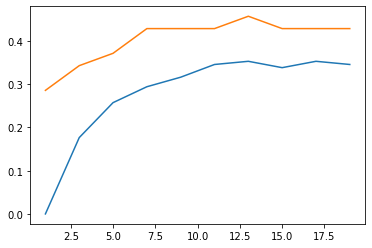

In [107]:
plt.plot(k,l1)
plt.plot(k,l2)

In [108]:
knn=KNeighborsClassifier(n_neighbors=1)
model=knn.fit(x_train,y_train)
y_predi=model.predict(x_test)
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_predi)

0.7674418604651163

In [109]:
x_train

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
188,1.52247,14.86,2.20,2.06,70.26,0.76,9.76,0.00,0.00
74,1.51596,13.02,3.56,1.54,73.11,0.72,7.90,0.00,0.00
126,1.51667,12.94,3.61,1.26,72.75,0.56,8.60,0.00,0.00
180,1.51299,14.40,1.74,1.54,74.55,0.00,7.59,0.00,0.00
76,1.51645,13.44,3.61,1.54,72.39,0.66,8.03,0.00,0.00
...,...,...,...,...,...,...,...,...,...
96,1.51841,13.02,3.62,1.06,72.34,0.64,9.13,0.00,0.15
62,1.52172,13.51,3.86,0.88,71.79,0.23,9.54,0.00,0.11
42,1.51779,13.21,3.39,1.33,72.76,0.59,8.59,0.00,0.00
128,1.52068,13.55,2.09,1.67,72.18,0.53,9.57,0.27,0.17


In [110]:
from sklearn.preprocessing import StandardScaler
std=StandardScaler()
tra=std.fit_transform(x_trainf)

In [111]:
data2=pd.DataFrame(tra)
data2

,0,1,2,3,4,5,6,7,8
0,-0.218141,-0.283880,0.068232,-0.256290,0.400138,0.077249,0.068151,-0.345110,0.392093
1,-0.024238,-0.366225,0.089729,-0.276038,0.238436,0.145358,0.104728,-0.345110,-0.611927
2,-0.247719,-1.177904,-0.003425,-0.256290,1.295714,0.162385,0.097413,-0.345110,2.065459
3,-0.201708,-0.895581,0.591325,-0.157549,0.362822,0.179412,-0.129363,-0.345110,-0.611927
4,-0.408757,-0.083901,0.562663,-0.532763,0.238436,0.060221,-0.363455,-0.345110,-0.611927
...,...,...,...,...,...,...,...,...,...
131,-0.826142,-0.425042,0.627154,0.197917,0.549400,0.349685,-0.802376,-0.345110,-0.611927
132,-0.356174,-0.789710,0.648651,-0.256290,0.163805,0.213467,-0.165940,-0.345110,-0.611927
133,-0.573082,-0.248590,0.612822,-0.078557,0.051858,0.162385,-0.356139,-0.345110,0.503650
134,-0.605947,-0.542677,0.333362,-0.374778,0.387699,0.196440,-0.085471,-0.345110,2.065459


In [112]:
transformed_cv=std.transform(x_cv)
transformed_test=std.transform(x_test)

In [113]:
train_error = []
def fun1(k):
    for i in range(1,k,2):
        knn = KNeighborsClassifier(n_neighbors=i)
        model = knn.fit(tra,y_trainf)
        y_predicted = model.predict(tra)
        acu = accuracy_score(y_trainf,y_predicted)
        train_error.append(1-acu)

In [114]:
fun1(20)

In [115]:
train_error

[0.0,
 0.20588235294117652,
 0.22058823529411764,
 0.25735294117647056,
 0.2647058823529411,
 0.2941176470588235,
 0.3088235294117647,
 0.3161764705882353,
 0.3161764705882353,
 0.3308823529411765]

In [116]:
cv_error = []

def fun2(k):
    for i in range(1,k,2):
        
        knn = KNeighborsClassifier(n_neighbors=i)
        model = knn.fit(tra,y_trainf)
        y_predicted = model.predict(transformed_cv)
        acu = accuracy_score(y_cv,y_predicted)
        cv_error.append(1-acu)
        

In [117]:
fun2(20)

In [118]:
cv_error

[0.37142857142857144,
 0.4285714285714286,
 0.4571428571428572,
 0.5142857142857142,
 0.5428571428571429,
 0.5714285714285714,
 0.5714285714285714,
 0.5714285714285714,
 0.5714285714285714,
 0.5428571428571429]

In [119]:
k1=[y for y in range(1,20,2)]

In [120]:
k1

[1, 3, 5, 7, 9, 11, 13, 15, 17, 19]

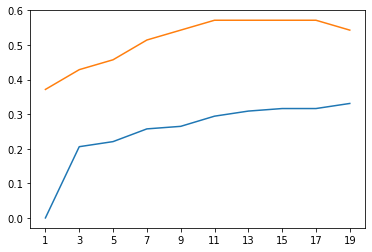

In [122]:
import matplotlib.pyplot as plt 
plt.plot(k1,train_error)
plt.xticks(k1)
plt.plot(k1,cv_error)
plt.xticks(k1)
plt.show()

In [123]:
knn = KNeighborsClassifier(n_neighbors=1)
model = knn.fit(tra,y_trainf)
y_predicted = model.predict(transformed_test)
acu = accuracy_score(y_test,y_predicted)

In [124]:
acu

0.6976744186046512